# Deep learning with Keras: part 2

## Goal: Learn to train neural networks & experiment with example code

## B) Image deblurring with grayscale ellipses

#### First import all the necessary packages. If you get an error here, make sure have actually installed the package!

In [1]:
import cv2
import glob

import numpy as np
#from numpy.linalg import norm

import imageio.v2 as imageio

import scipy.io
from scipy.io import savemat

from tensorflow.keras import Model, layers, Input
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.layers.core import Dense
from tensorflow.keras.layers import Add, BatchNormalization, Convolution2D, UpSampling2D, Dense, MaxPooling2D, concatenate
#from tensorflow.keras.layers.convolutional import MaxPooling2D
import tensorflow.keras.backend as K 
#from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf

from sklearn.model_selection import train_test_split
from skimage import transform

import skimage
from skimage.measure import block_reduce

import matplotlib.pyplot as plt

from random import randrange

%matplotlib inline 

2023-08-03 13:47:01.815015: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 13:47:04.878946: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/local/sirautio/tf2/lib/python3.10/site-packages/cv2/../../lib64:
2023-08-03 13:47:04.879292: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/local/sirautio/tf2/lib/python3.10/site-packages/cv2/.

#### Load the training data from directory (mat-files)

In [21]:
# Desired dimensions for data
N = 128 # gt dimensions
M = 128 # input dimensions
X = 1   # color channels

# Import training input
train_input = []
files       = sorted(glob.glob("ellipses_train/*.mat"))

sigma = 3.0 # blurring 

for myFile in files:
    print(myFile)
    mat    = scipy.io.loadmat(myFile)
    matrix = mat['ph']
    
    # resize matrix
    matrix_resized = cv2.resize(matrix, dsize=(M,M), interpolation=cv2.INTER_CUBIC)
    
    # apply gaussian blur
    matrix_blurred = skimage.filters.gaussian(matrix_resized, sigma=(sigma,sigma), truncate=3.5, channel_axis=-1)
    
    train_input.append(matrix_blurred)  
train_input = np.array(train_input)

# Import training output (ground truth)
train_gt = []
files    = sorted(glob.glob("ellipses_train/*.mat"))

for myFile in files:
    print(myFile)
    mat    = scipy.io.loadmat(myFile)
    matrix = mat['ph']
    
    # resize matrix
    matrix_resized = cv2.resize(matrix, dsize=(N,N), interpolation=cv2.INTER_CUBIC)
    
    train_gt.append(matrix_resized)  
train_gt = np.array(train_gt)

ellipses_train/ph0001.mat
ellipses_train/ph0002.mat
ellipses_train/ph0003.mat
ellipses_train/ph0004.mat
ellipses_train/ph0005.mat
ellipses_train/ph0006.mat
ellipses_train/ph0007.mat
ellipses_train/ph0008.mat
ellipses_train/ph0009.mat
ellipses_train/ph0010.mat
ellipses_train/ph0011.mat
ellipses_train/ph0012.mat
ellipses_train/ph0013.mat
ellipses_train/ph0014.mat
ellipses_train/ph0015.mat
ellipses_train/ph0016.mat
ellipses_train/ph0017.mat
ellipses_train/ph0018.mat
ellipses_train/ph0019.mat
ellipses_train/ph0020.mat
ellipses_train/ph0021.mat
ellipses_train/ph0022.mat
ellipses_train/ph0023.mat
ellipses_train/ph0024.mat
ellipses_train/ph0025.mat
ellipses_train/ph0026.mat
ellipses_train/ph0027.mat
ellipses_train/ph0028.mat
ellipses_train/ph0029.mat
ellipses_train/ph0030.mat
ellipses_train/ph0031.mat
ellipses_train/ph0032.mat
ellipses_train/ph0033.mat
ellipses_train/ph0034.mat
ellipses_train/ph0035.mat
ellipses_train/ph0036.mat
ellipses_train/ph0037.mat
ellipses_train/ph0038.mat
ellipses_tra

ellipses_train/ph0403.mat
ellipses_train/ph0404.mat
ellipses_train/ph0405.mat
ellipses_train/ph0406.mat
ellipses_train/ph0407.mat
ellipses_train/ph0408.mat
ellipses_train/ph0409.mat
ellipses_train/ph0410.mat
ellipses_train/ph0411.mat
ellipses_train/ph0412.mat
ellipses_train/ph0413.mat
ellipses_train/ph0414.mat
ellipses_train/ph0415.mat
ellipses_train/ph0416.mat
ellipses_train/ph0417.mat
ellipses_train/ph0418.mat
ellipses_train/ph0419.mat
ellipses_train/ph0420.mat
ellipses_train/ph0421.mat
ellipses_train/ph0422.mat
ellipses_train/ph0423.mat
ellipses_train/ph0424.mat
ellipses_train/ph0425.mat
ellipses_train/ph0426.mat
ellipses_train/ph0427.mat
ellipses_train/ph0428.mat
ellipses_train/ph0429.mat
ellipses_train/ph0430.mat
ellipses_train/ph0431.mat
ellipses_train/ph0432.mat
ellipses_train/ph0433.mat
ellipses_train/ph0434.mat
ellipses_train/ph0435.mat
ellipses_train/ph0436.mat
ellipses_train/ph0437.mat
ellipses_train/ph0438.mat
ellipses_train/ph0439.mat
ellipses_train/ph0440.mat
ellipses_tra

ellipses_train/ph0773.mat
ellipses_train/ph0774.mat
ellipses_train/ph0775.mat
ellipses_train/ph0776.mat
ellipses_train/ph0777.mat
ellipses_train/ph0778.mat
ellipses_train/ph0779.mat
ellipses_train/ph0780.mat
ellipses_train/ph0781.mat
ellipses_train/ph0782.mat
ellipses_train/ph0783.mat
ellipses_train/ph0784.mat
ellipses_train/ph0785.mat
ellipses_train/ph0786.mat
ellipses_train/ph0787.mat
ellipses_train/ph0788.mat
ellipses_train/ph0789.mat
ellipses_train/ph0790.mat
ellipses_train/ph0791.mat
ellipses_train/ph0792.mat
ellipses_train/ph0793.mat
ellipses_train/ph0794.mat
ellipses_train/ph0795.mat
ellipses_train/ph0796.mat
ellipses_train/ph0797.mat
ellipses_train/ph0798.mat
ellipses_train/ph0799.mat
ellipses_train/ph0800.mat
ellipses_train/ph0801.mat
ellipses_train/ph0802.mat
ellipses_train/ph0803.mat
ellipses_train/ph0804.mat
ellipses_train/ph0805.mat
ellipses_train/ph0806.mat
ellipses_train/ph0807.mat
ellipses_train/ph0808.mat
ellipses_train/ph0809.mat
ellipses_train/ph0810.mat
ellipses_tra

ellipses_train/ph1121.mat
ellipses_train/ph1122.mat
ellipses_train/ph1123.mat
ellipses_train/ph1124.mat
ellipses_train/ph1125.mat
ellipses_train/ph1126.mat
ellipses_train/ph1127.mat
ellipses_train/ph1128.mat
ellipses_train/ph1129.mat
ellipses_train/ph1130.mat
ellipses_train/ph1131.mat
ellipses_train/ph1132.mat
ellipses_train/ph1133.mat
ellipses_train/ph1134.mat
ellipses_train/ph1135.mat
ellipses_train/ph1136.mat
ellipses_train/ph1137.mat
ellipses_train/ph1138.mat
ellipses_train/ph1139.mat
ellipses_train/ph1140.mat
ellipses_train/ph1141.mat
ellipses_train/ph1142.mat
ellipses_train/ph1143.mat
ellipses_train/ph1144.mat
ellipses_train/ph1145.mat
ellipses_train/ph1146.mat
ellipses_train/ph1147.mat
ellipses_train/ph1148.mat
ellipses_train/ph1149.mat
ellipses_train/ph1150.mat
ellipses_train/ph1151.mat
ellipses_train/ph1152.mat
ellipses_train/ph1153.mat
ellipses_train/ph1154.mat
ellipses_train/ph1155.mat
ellipses_train/ph1156.mat
ellipses_train/ph1157.mat
ellipses_train/ph1158.mat
ellipses_tra

ellipses_train/ph1465.mat
ellipses_train/ph1466.mat
ellipses_train/ph1467.mat
ellipses_train/ph1468.mat
ellipses_train/ph1469.mat
ellipses_train/ph1470.mat
ellipses_train/ph1471.mat
ellipses_train/ph1472.mat
ellipses_train/ph1473.mat
ellipses_train/ph1474.mat
ellipses_train/ph1475.mat
ellipses_train/ph1476.mat
ellipses_train/ph1477.mat
ellipses_train/ph1478.mat
ellipses_train/ph1479.mat
ellipses_train/ph1480.mat
ellipses_train/ph1481.mat
ellipses_train/ph1482.mat
ellipses_train/ph1483.mat
ellipses_train/ph1484.mat
ellipses_train/ph1485.mat
ellipses_train/ph1486.mat
ellipses_train/ph1487.mat
ellipses_train/ph1488.mat
ellipses_train/ph1489.mat
ellipses_train/ph1490.mat
ellipses_train/ph1491.mat
ellipses_train/ph1492.mat
ellipses_train/ph1493.mat
ellipses_train/ph1494.mat
ellipses_train/ph1495.mat
ellipses_train/ph1496.mat
ellipses_train/ph1497.mat
ellipses_train/ph1498.mat
ellipses_train/ph1499.mat
ellipses_train/ph1500.mat
ellipses_train/ph1501.mat
ellipses_train/ph1502.mat
ellipses_tra

ellipses_train/ph1813.mat
ellipses_train/ph1814.mat
ellipses_train/ph1815.mat
ellipses_train/ph1816.mat
ellipses_train/ph1817.mat
ellipses_train/ph1818.mat
ellipses_train/ph1819.mat
ellipses_train/ph1820.mat
ellipses_train/ph1821.mat
ellipses_train/ph1822.mat
ellipses_train/ph1823.mat
ellipses_train/ph1824.mat
ellipses_train/ph1825.mat
ellipses_train/ph1826.mat
ellipses_train/ph1827.mat
ellipses_train/ph1828.mat
ellipses_train/ph1829.mat
ellipses_train/ph1830.mat
ellipses_train/ph1831.mat
ellipses_train/ph1832.mat
ellipses_train/ph1833.mat
ellipses_train/ph1834.mat
ellipses_train/ph1835.mat
ellipses_train/ph1836.mat
ellipses_train/ph1837.mat
ellipses_train/ph1838.mat
ellipses_train/ph1839.mat
ellipses_train/ph1840.mat
ellipses_train/ph1841.mat
ellipses_train/ph1842.mat
ellipses_train/ph1843.mat
ellipses_train/ph1844.mat
ellipses_train/ph1845.mat
ellipses_train/ph1846.mat
ellipses_train/ph1847.mat
ellipses_train/ph1848.mat
ellipses_train/ph1849.mat
ellipses_train/ph1850.mat
ellipses_tra

ellipses_train/ph2191.mat
ellipses_train/ph2192.mat
ellipses_train/ph2193.mat
ellipses_train/ph2194.mat
ellipses_train/ph2195.mat
ellipses_train/ph2196.mat
ellipses_train/ph2197.mat
ellipses_train/ph2198.mat
ellipses_train/ph2199.mat
ellipses_train/ph2200.mat
ellipses_train/ph2201.mat
ellipses_train/ph2202.mat
ellipses_train/ph2203.mat
ellipses_train/ph2204.mat
ellipses_train/ph2205.mat
ellipses_train/ph2206.mat
ellipses_train/ph2207.mat
ellipses_train/ph2208.mat
ellipses_train/ph2209.mat
ellipses_train/ph2210.mat
ellipses_train/ph2211.mat
ellipses_train/ph2212.mat
ellipses_train/ph2213.mat
ellipses_train/ph2214.mat
ellipses_train/ph2215.mat
ellipses_train/ph2216.mat
ellipses_train/ph2217.mat
ellipses_train/ph2218.mat
ellipses_train/ph2219.mat
ellipses_train/ph2220.mat
ellipses_train/ph2221.mat
ellipses_train/ph2222.mat
ellipses_train/ph2223.mat
ellipses_train/ph2224.mat
ellipses_train/ph2225.mat
ellipses_train/ph2226.mat
ellipses_train/ph2227.mat
ellipses_train/ph2228.mat
ellipses_tra

ellipses_train/ph2550.mat
ellipses_train/ph2551.mat
ellipses_train/ph2552.mat
ellipses_train/ph2553.mat
ellipses_train/ph2554.mat
ellipses_train/ph2555.mat
ellipses_train/ph2556.mat
ellipses_train/ph2557.mat
ellipses_train/ph2558.mat
ellipses_train/ph2559.mat
ellipses_train/ph2560.mat
ellipses_train/ph2561.mat
ellipses_train/ph2562.mat
ellipses_train/ph2563.mat
ellipses_train/ph2564.mat
ellipses_train/ph2565.mat
ellipses_train/ph2566.mat
ellipses_train/ph2567.mat
ellipses_train/ph2568.mat
ellipses_train/ph2569.mat
ellipses_train/ph2570.mat
ellipses_train/ph2571.mat
ellipses_train/ph2572.mat
ellipses_train/ph2573.mat
ellipses_train/ph2574.mat
ellipses_train/ph2575.mat
ellipses_train/ph2576.mat
ellipses_train/ph2577.mat
ellipses_train/ph2578.mat
ellipses_train/ph2579.mat
ellipses_train/ph2580.mat
ellipses_train/ph2581.mat
ellipses_train/ph2582.mat
ellipses_train/ph2583.mat
ellipses_train/ph2584.mat
ellipses_train/ph2585.mat
ellipses_train/ph2586.mat
ellipses_train/ph2587.mat
ellipses_tra

ellipses_train/ph2896.mat
ellipses_train/ph2897.mat
ellipses_train/ph2898.mat
ellipses_train/ph2899.mat
ellipses_train/ph2900.mat
ellipses_train/ph2901.mat
ellipses_train/ph2902.mat
ellipses_train/ph2903.mat
ellipses_train/ph2904.mat
ellipses_train/ph2905.mat
ellipses_train/ph2906.mat
ellipses_train/ph2907.mat
ellipses_train/ph2908.mat
ellipses_train/ph2909.mat
ellipses_train/ph2910.mat
ellipses_train/ph2911.mat
ellipses_train/ph2912.mat
ellipses_train/ph2913.mat
ellipses_train/ph2914.mat
ellipses_train/ph2915.mat
ellipses_train/ph2916.mat
ellipses_train/ph2917.mat
ellipses_train/ph2918.mat
ellipses_train/ph2919.mat
ellipses_train/ph2920.mat
ellipses_train/ph2921.mat
ellipses_train/ph2922.mat
ellipses_train/ph2923.mat
ellipses_train/ph2924.mat
ellipses_train/ph2925.mat
ellipses_train/ph2926.mat
ellipses_train/ph2927.mat
ellipses_train/ph2928.mat
ellipses_train/ph2929.mat
ellipses_train/ph2930.mat
ellipses_train/ph2931.mat
ellipses_train/ph2932.mat
ellipses_train/ph2933.mat
ellipses_tra

ellipses_train/ph3236.mat
ellipses_train/ph3237.mat
ellipses_train/ph3238.mat
ellipses_train/ph3239.mat
ellipses_train/ph3240.mat
ellipses_train/ph3241.mat
ellipses_train/ph3242.mat
ellipses_train/ph3243.mat
ellipses_train/ph3244.mat
ellipses_train/ph3245.mat
ellipses_train/ph3246.mat
ellipses_train/ph3247.mat
ellipses_train/ph3248.mat
ellipses_train/ph3249.mat
ellipses_train/ph3250.mat
ellipses_train/ph3251.mat
ellipses_train/ph3252.mat
ellipses_train/ph3253.mat
ellipses_train/ph3254.mat
ellipses_train/ph3255.mat
ellipses_train/ph3256.mat
ellipses_train/ph3257.mat
ellipses_train/ph3258.mat
ellipses_train/ph3259.mat
ellipses_train/ph3260.mat
ellipses_train/ph3261.mat
ellipses_train/ph3262.mat
ellipses_train/ph3263.mat
ellipses_train/ph3264.mat
ellipses_train/ph3265.mat
ellipses_train/ph3266.mat
ellipses_train/ph3267.mat
ellipses_train/ph3268.mat
ellipses_train/ph3269.mat
ellipses_train/ph3270.mat
ellipses_train/ph3271.mat
ellipses_train/ph3272.mat
ellipses_train/ph3273.mat
ellipses_tra

ellipses_train/ph3587.mat
ellipses_train/ph3588.mat
ellipses_train/ph3589.mat
ellipses_train/ph3590.mat
ellipses_train/ph3591.mat
ellipses_train/ph3592.mat
ellipses_train/ph3593.mat
ellipses_train/ph3594.mat
ellipses_train/ph3595.mat
ellipses_train/ph3596.mat
ellipses_train/ph3597.mat
ellipses_train/ph3598.mat
ellipses_train/ph3599.mat
ellipses_train/ph3600.mat
ellipses_train/ph3601.mat
ellipses_train/ph3602.mat
ellipses_train/ph3603.mat
ellipses_train/ph3604.mat
ellipses_train/ph3605.mat
ellipses_train/ph3606.mat
ellipses_train/ph3607.mat
ellipses_train/ph3608.mat
ellipses_train/ph3609.mat
ellipses_train/ph3610.mat
ellipses_train/ph3611.mat
ellipses_train/ph3612.mat
ellipses_train/ph3613.mat
ellipses_train/ph3614.mat
ellipses_train/ph3615.mat
ellipses_train/ph3616.mat
ellipses_train/ph3617.mat
ellipses_train/ph3618.mat
ellipses_train/ph3619.mat
ellipses_train/ph3620.mat
ellipses_train/ph3621.mat
ellipses_train/ph3622.mat
ellipses_train/ph3623.mat
ellipses_train/ph3624.mat
ellipses_tra

ellipses_train/ph3933.mat
ellipses_train/ph3934.mat
ellipses_train/ph3935.mat
ellipses_train/ph3936.mat
ellipses_train/ph3937.mat
ellipses_train/ph3938.mat
ellipses_train/ph3939.mat
ellipses_train/ph3940.mat
ellipses_train/ph3941.mat
ellipses_train/ph3942.mat
ellipses_train/ph3943.mat
ellipses_train/ph3944.mat
ellipses_train/ph3945.mat
ellipses_train/ph3946.mat
ellipses_train/ph3947.mat
ellipses_train/ph3948.mat
ellipses_train/ph3949.mat
ellipses_train/ph3950.mat
ellipses_train/ph3951.mat
ellipses_train/ph3952.mat
ellipses_train/ph3953.mat
ellipses_train/ph3954.mat
ellipses_train/ph3955.mat
ellipses_train/ph3956.mat
ellipses_train/ph3957.mat
ellipses_train/ph3958.mat
ellipses_train/ph3959.mat
ellipses_train/ph3960.mat
ellipses_train/ph3961.mat
ellipses_train/ph3962.mat
ellipses_train/ph3963.mat
ellipses_train/ph3964.mat
ellipses_train/ph3965.mat
ellipses_train/ph3966.mat
ellipses_train/ph3967.mat
ellipses_train/ph3968.mat
ellipses_train/ph3969.mat
ellipses_train/ph3970.mat
ellipses_tra

ellipses_train/ph4266.mat
ellipses_train/ph4267.mat
ellipses_train/ph4268.mat
ellipses_train/ph4269.mat
ellipses_train/ph4270.mat
ellipses_train/ph4271.mat
ellipses_train/ph4272.mat
ellipses_train/ph4273.mat
ellipses_train/ph4274.mat
ellipses_train/ph4275.mat
ellipses_train/ph4276.mat
ellipses_train/ph4277.mat
ellipses_train/ph4278.mat
ellipses_train/ph4279.mat
ellipses_train/ph4280.mat
ellipses_train/ph4281.mat
ellipses_train/ph4282.mat
ellipses_train/ph4283.mat
ellipses_train/ph4284.mat
ellipses_train/ph4285.mat
ellipses_train/ph4286.mat
ellipses_train/ph4287.mat
ellipses_train/ph4288.mat
ellipses_train/ph4289.mat
ellipses_train/ph4290.mat
ellipses_train/ph4291.mat
ellipses_train/ph4292.mat
ellipses_train/ph4293.mat
ellipses_train/ph4294.mat
ellipses_train/ph4295.mat
ellipses_train/ph4296.mat
ellipses_train/ph4297.mat
ellipses_train/ph4298.mat
ellipses_train/ph4299.mat
ellipses_train/ph4300.mat
ellipses_train/ph4301.mat
ellipses_train/ph4302.mat
ellipses_train/ph4303.mat
ellipses_tra

ellipses_train/ph4609.mat
ellipses_train/ph4610.mat
ellipses_train/ph4611.mat
ellipses_train/ph4612.mat
ellipses_train/ph4613.mat
ellipses_train/ph4614.mat
ellipses_train/ph4615.mat
ellipses_train/ph4616.mat
ellipses_train/ph4617.mat
ellipses_train/ph4618.mat
ellipses_train/ph4619.mat
ellipses_train/ph4620.mat
ellipses_train/ph4621.mat
ellipses_train/ph4622.mat
ellipses_train/ph4623.mat
ellipses_train/ph4624.mat
ellipses_train/ph4625.mat
ellipses_train/ph4626.mat
ellipses_train/ph4627.mat
ellipses_train/ph4628.mat
ellipses_train/ph4629.mat
ellipses_train/ph4630.mat
ellipses_train/ph4631.mat
ellipses_train/ph4632.mat
ellipses_train/ph4633.mat
ellipses_train/ph4634.mat
ellipses_train/ph4635.mat
ellipses_train/ph4636.mat
ellipses_train/ph4637.mat
ellipses_train/ph4638.mat
ellipses_train/ph4639.mat
ellipses_train/ph4640.mat
ellipses_train/ph4641.mat
ellipses_train/ph4642.mat
ellipses_train/ph4643.mat
ellipses_train/ph4644.mat
ellipses_train/ph4645.mat
ellipses_train/ph4646.mat
ellipses_tra

ellipses_train/ph4939.mat
ellipses_train/ph4940.mat
ellipses_train/ph4941.mat
ellipses_train/ph4942.mat
ellipses_train/ph4943.mat
ellipses_train/ph4944.mat
ellipses_train/ph4945.mat
ellipses_train/ph4946.mat
ellipses_train/ph4947.mat
ellipses_train/ph4948.mat
ellipses_train/ph4949.mat
ellipses_train/ph4950.mat
ellipses_train/ph4951.mat
ellipses_train/ph4952.mat
ellipses_train/ph4953.mat
ellipses_train/ph4954.mat
ellipses_train/ph4955.mat
ellipses_train/ph4956.mat
ellipses_train/ph4957.mat
ellipses_train/ph4958.mat
ellipses_train/ph4959.mat
ellipses_train/ph4960.mat
ellipses_train/ph4961.mat
ellipses_train/ph4962.mat
ellipses_train/ph4963.mat
ellipses_train/ph4964.mat
ellipses_train/ph4965.mat
ellipses_train/ph4966.mat
ellipses_train/ph4967.mat
ellipses_train/ph4968.mat
ellipses_train/ph4969.mat
ellipses_train/ph4970.mat
ellipses_train/ph4971.mat
ellipses_train/ph4972.mat
ellipses_train/ph4973.mat
ellipses_train/ph4974.mat
ellipses_train/ph4975.mat
ellipses_train/ph4976.mat
ellipses_tra

ellipses_train/ph0405.mat
ellipses_train/ph0406.mat
ellipses_train/ph0407.mat
ellipses_train/ph0408.mat
ellipses_train/ph0409.mat
ellipses_train/ph0410.mat
ellipses_train/ph0411.mat
ellipses_train/ph0412.mat
ellipses_train/ph0413.mat
ellipses_train/ph0414.mat
ellipses_train/ph0415.mat
ellipses_train/ph0416.mat
ellipses_train/ph0417.mat
ellipses_train/ph0418.mat
ellipses_train/ph0419.mat
ellipses_train/ph0420.mat
ellipses_train/ph0421.mat
ellipses_train/ph0422.mat
ellipses_train/ph0423.mat
ellipses_train/ph0424.mat
ellipses_train/ph0425.mat
ellipses_train/ph0426.mat
ellipses_train/ph0427.mat
ellipses_train/ph0428.mat
ellipses_train/ph0429.mat
ellipses_train/ph0430.mat
ellipses_train/ph0431.mat
ellipses_train/ph0432.mat
ellipses_train/ph0433.mat
ellipses_train/ph0434.mat
ellipses_train/ph0435.mat
ellipses_train/ph0436.mat
ellipses_train/ph0437.mat
ellipses_train/ph0438.mat
ellipses_train/ph0439.mat
ellipses_train/ph0440.mat
ellipses_train/ph0441.mat
ellipses_train/ph0442.mat
ellipses_tra

ellipses_train/ph0850.mat
ellipses_train/ph0851.mat
ellipses_train/ph0852.mat
ellipses_train/ph0853.mat
ellipses_train/ph0854.mat
ellipses_train/ph0855.mat
ellipses_train/ph0856.mat
ellipses_train/ph0857.mat
ellipses_train/ph0858.mat
ellipses_train/ph0859.mat
ellipses_train/ph0860.mat
ellipses_train/ph0861.mat
ellipses_train/ph0862.mat
ellipses_train/ph0863.mat
ellipses_train/ph0864.mat
ellipses_train/ph0865.mat
ellipses_train/ph0866.mat
ellipses_train/ph0867.mat
ellipses_train/ph0868.mat
ellipses_train/ph0869.mat
ellipses_train/ph0870.mat
ellipses_train/ph0871.mat
ellipses_train/ph0872.mat
ellipses_train/ph0873.mat
ellipses_train/ph0874.mat
ellipses_train/ph0875.mat
ellipses_train/ph0876.mat
ellipses_train/ph0877.mat
ellipses_train/ph0878.mat
ellipses_train/ph0879.mat
ellipses_train/ph0880.mat
ellipses_train/ph0881.mat
ellipses_train/ph0882.mat
ellipses_train/ph0883.mat
ellipses_train/ph0884.mat
ellipses_train/ph0885.mat
ellipses_train/ph0886.mat
ellipses_train/ph0887.mat
ellipses_tra

ellipses_train/ph1171.mat
ellipses_train/ph1172.mat
ellipses_train/ph1173.mat
ellipses_train/ph1174.mat
ellipses_train/ph1175.mat
ellipses_train/ph1176.mat
ellipses_train/ph1177.mat
ellipses_train/ph1178.mat
ellipses_train/ph1179.mat
ellipses_train/ph1180.mat
ellipses_train/ph1181.mat
ellipses_train/ph1182.mat
ellipses_train/ph1183.mat
ellipses_train/ph1184.mat
ellipses_train/ph1185.mat
ellipses_train/ph1186.mat
ellipses_train/ph1187.mat
ellipses_train/ph1188.mat
ellipses_train/ph1189.mat
ellipses_train/ph1190.mat
ellipses_train/ph1191.mat
ellipses_train/ph1192.mat
ellipses_train/ph1193.mat
ellipses_train/ph1194.mat
ellipses_train/ph1195.mat
ellipses_train/ph1196.mat
ellipses_train/ph1197.mat
ellipses_train/ph1198.mat
ellipses_train/ph1199.mat
ellipses_train/ph1200.mat
ellipses_train/ph1201.mat
ellipses_train/ph1202.mat
ellipses_train/ph1203.mat
ellipses_train/ph1204.mat
ellipses_train/ph1205.mat
ellipses_train/ph1206.mat
ellipses_train/ph1207.mat
ellipses_train/ph1208.mat
ellipses_tra

ellipses_train/ph1499.mat
ellipses_train/ph1500.mat
ellipses_train/ph1501.mat
ellipses_train/ph1502.mat
ellipses_train/ph1503.mat
ellipses_train/ph1504.mat
ellipses_train/ph1505.mat
ellipses_train/ph1506.mat
ellipses_train/ph1507.mat
ellipses_train/ph1508.mat
ellipses_train/ph1509.mat
ellipses_train/ph1510.mat
ellipses_train/ph1511.mat
ellipses_train/ph1512.mat
ellipses_train/ph1513.mat
ellipses_train/ph1514.mat
ellipses_train/ph1515.mat
ellipses_train/ph1516.mat
ellipses_train/ph1517.mat
ellipses_train/ph1518.mat
ellipses_train/ph1519.mat
ellipses_train/ph1520.mat
ellipses_train/ph1521.mat
ellipses_train/ph1522.mat
ellipses_train/ph1523.mat
ellipses_train/ph1524.mat
ellipses_train/ph1525.mat
ellipses_train/ph1526.mat
ellipses_train/ph1527.mat
ellipses_train/ph1528.mat
ellipses_train/ph1529.mat
ellipses_train/ph1530.mat
ellipses_train/ph1531.mat
ellipses_train/ph1532.mat
ellipses_train/ph1533.mat
ellipses_train/ph1534.mat
ellipses_train/ph1535.mat
ellipses_train/ph1536.mat
ellipses_tra

ellipses_train/ph1850.mat
ellipses_train/ph1851.mat
ellipses_train/ph1852.mat
ellipses_train/ph1853.mat
ellipses_train/ph1854.mat
ellipses_train/ph1855.mat
ellipses_train/ph1856.mat
ellipses_train/ph1857.mat
ellipses_train/ph1858.mat
ellipses_train/ph1859.mat
ellipses_train/ph1860.mat
ellipses_train/ph1861.mat
ellipses_train/ph1862.mat
ellipses_train/ph1863.mat
ellipses_train/ph1864.mat
ellipses_train/ph1865.mat
ellipses_train/ph1866.mat
ellipses_train/ph1867.mat
ellipses_train/ph1868.mat
ellipses_train/ph1869.mat
ellipses_train/ph1870.mat
ellipses_train/ph1871.mat
ellipses_train/ph1872.mat
ellipses_train/ph1873.mat
ellipses_train/ph1874.mat
ellipses_train/ph1875.mat
ellipses_train/ph1876.mat
ellipses_train/ph1877.mat
ellipses_train/ph1878.mat
ellipses_train/ph1879.mat
ellipses_train/ph1880.mat
ellipses_train/ph1881.mat
ellipses_train/ph1882.mat
ellipses_train/ph1883.mat
ellipses_train/ph1884.mat
ellipses_train/ph1885.mat
ellipses_train/ph1886.mat
ellipses_train/ph1887.mat
ellipses_tra

ellipses_train/ph2316.mat
ellipses_train/ph2317.mat
ellipses_train/ph2318.mat
ellipses_train/ph2319.mat
ellipses_train/ph2320.mat
ellipses_train/ph2321.mat
ellipses_train/ph2322.mat
ellipses_train/ph2323.mat
ellipses_train/ph2324.mat
ellipses_train/ph2325.mat
ellipses_train/ph2326.mat
ellipses_train/ph2327.mat
ellipses_train/ph2328.mat
ellipses_train/ph2329.mat
ellipses_train/ph2330.mat
ellipses_train/ph2331.mat
ellipses_train/ph2332.mat
ellipses_train/ph2333.mat
ellipses_train/ph2334.mat
ellipses_train/ph2335.mat
ellipses_train/ph2336.mat
ellipses_train/ph2337.mat
ellipses_train/ph2338.mat
ellipses_train/ph2339.mat
ellipses_train/ph2340.mat
ellipses_train/ph2341.mat
ellipses_train/ph2342.mat
ellipses_train/ph2343.mat
ellipses_train/ph2344.mat
ellipses_train/ph2345.mat
ellipses_train/ph2346.mat
ellipses_train/ph2347.mat
ellipses_train/ph2348.mat
ellipses_train/ph2349.mat
ellipses_train/ph2350.mat
ellipses_train/ph2351.mat
ellipses_train/ph2352.mat
ellipses_train/ph2353.mat
ellipses_tra

ellipses_train/ph2708.mat
ellipses_train/ph2709.mat
ellipses_train/ph2710.mat
ellipses_train/ph2711.mat
ellipses_train/ph2712.mat
ellipses_train/ph2713.mat
ellipses_train/ph2714.mat
ellipses_train/ph2715.mat
ellipses_train/ph2716.mat
ellipses_train/ph2717.mat
ellipses_train/ph2718.mat
ellipses_train/ph2719.mat
ellipses_train/ph2720.mat
ellipses_train/ph2721.mat
ellipses_train/ph2722.mat
ellipses_train/ph2723.mat
ellipses_train/ph2724.mat
ellipses_train/ph2725.mat
ellipses_train/ph2726.mat
ellipses_train/ph2727.mat
ellipses_train/ph2728.mat
ellipses_train/ph2729.mat
ellipses_train/ph2730.mat
ellipses_train/ph2731.mat
ellipses_train/ph2732.mat
ellipses_train/ph2733.mat
ellipses_train/ph2734.mat
ellipses_train/ph2735.mat
ellipses_train/ph2736.mat
ellipses_train/ph2737.mat
ellipses_train/ph2738.mat
ellipses_train/ph2739.mat
ellipses_train/ph2740.mat
ellipses_train/ph2741.mat
ellipses_train/ph2742.mat
ellipses_train/ph2743.mat
ellipses_train/ph2744.mat
ellipses_train/ph2745.mat
ellipses_tra

ellipses_train/ph3140.mat
ellipses_train/ph3141.mat
ellipses_train/ph3142.mat
ellipses_train/ph3143.mat
ellipses_train/ph3144.mat
ellipses_train/ph3145.mat
ellipses_train/ph3146.mat
ellipses_train/ph3147.mat
ellipses_train/ph3148.mat
ellipses_train/ph3149.mat
ellipses_train/ph3150.mat
ellipses_train/ph3151.mat
ellipses_train/ph3152.mat
ellipses_train/ph3153.mat
ellipses_train/ph3154.mat
ellipses_train/ph3155.mat
ellipses_train/ph3156.mat
ellipses_train/ph3157.mat
ellipses_train/ph3158.mat
ellipses_train/ph3159.mat
ellipses_train/ph3160.mat
ellipses_train/ph3161.mat
ellipses_train/ph3162.mat
ellipses_train/ph3163.mat
ellipses_train/ph3164.mat
ellipses_train/ph3165.mat
ellipses_train/ph3166.mat
ellipses_train/ph3167.mat
ellipses_train/ph3168.mat
ellipses_train/ph3169.mat
ellipses_train/ph3170.mat
ellipses_train/ph3171.mat
ellipses_train/ph3172.mat
ellipses_train/ph3173.mat
ellipses_train/ph3174.mat
ellipses_train/ph3175.mat
ellipses_train/ph3176.mat
ellipses_train/ph3177.mat
ellipses_tra

ellipses_train/ph3521.mat
ellipses_train/ph3522.mat
ellipses_train/ph3523.mat
ellipses_train/ph3524.mat
ellipses_train/ph3525.mat
ellipses_train/ph3526.mat
ellipses_train/ph3527.mat
ellipses_train/ph3528.mat
ellipses_train/ph3529.mat
ellipses_train/ph3530.mat
ellipses_train/ph3531.mat
ellipses_train/ph3532.mat
ellipses_train/ph3533.mat
ellipses_train/ph3534.mat
ellipses_train/ph3535.mat
ellipses_train/ph3536.mat
ellipses_train/ph3537.mat
ellipses_train/ph3538.mat
ellipses_train/ph3539.mat
ellipses_train/ph3540.mat
ellipses_train/ph3541.mat
ellipses_train/ph3542.mat
ellipses_train/ph3543.mat
ellipses_train/ph3544.mat
ellipses_train/ph3545.mat
ellipses_train/ph3546.mat
ellipses_train/ph3547.mat
ellipses_train/ph3548.mat
ellipses_train/ph3549.mat
ellipses_train/ph3550.mat
ellipses_train/ph3551.mat
ellipses_train/ph3552.mat
ellipses_train/ph3553.mat
ellipses_train/ph3554.mat
ellipses_train/ph3555.mat
ellipses_train/ph3556.mat
ellipses_train/ph3557.mat
ellipses_train/ph3558.mat
ellipses_tra

ellipses_train/ph3949.mat
ellipses_train/ph3950.mat
ellipses_train/ph3951.mat
ellipses_train/ph3952.mat
ellipses_train/ph3953.mat
ellipses_train/ph3954.mat
ellipses_train/ph3955.mat
ellipses_train/ph3956.mat
ellipses_train/ph3957.mat
ellipses_train/ph3958.mat
ellipses_train/ph3959.mat
ellipses_train/ph3960.mat
ellipses_train/ph3961.mat
ellipses_train/ph3962.mat
ellipses_train/ph3963.mat
ellipses_train/ph3964.mat
ellipses_train/ph3965.mat
ellipses_train/ph3966.mat
ellipses_train/ph3967.mat
ellipses_train/ph3968.mat
ellipses_train/ph3969.mat
ellipses_train/ph3970.mat
ellipses_train/ph3971.mat
ellipses_train/ph3972.mat
ellipses_train/ph3973.mat
ellipses_train/ph3974.mat
ellipses_train/ph3975.mat
ellipses_train/ph3976.mat
ellipses_train/ph3977.mat
ellipses_train/ph3978.mat
ellipses_train/ph3979.mat
ellipses_train/ph3980.mat
ellipses_train/ph3981.mat
ellipses_train/ph3982.mat
ellipses_train/ph3983.mat
ellipses_train/ph3984.mat
ellipses_train/ph3985.mat
ellipses_train/ph3986.mat
ellipses_tra

ellipses_train/ph4394.mat
ellipses_train/ph4395.mat
ellipses_train/ph4396.mat
ellipses_train/ph4397.mat
ellipses_train/ph4398.mat
ellipses_train/ph4399.mat
ellipses_train/ph4400.mat
ellipses_train/ph4401.mat
ellipses_train/ph4402.mat
ellipses_train/ph4403.mat
ellipses_train/ph4404.mat
ellipses_train/ph4405.mat
ellipses_train/ph4406.mat
ellipses_train/ph4407.mat
ellipses_train/ph4408.mat
ellipses_train/ph4409.mat
ellipses_train/ph4410.mat
ellipses_train/ph4411.mat
ellipses_train/ph4412.mat
ellipses_train/ph4413.mat
ellipses_train/ph4414.mat
ellipses_train/ph4415.mat
ellipses_train/ph4416.mat
ellipses_train/ph4417.mat
ellipses_train/ph4418.mat
ellipses_train/ph4419.mat
ellipses_train/ph4420.mat
ellipses_train/ph4421.mat
ellipses_train/ph4422.mat
ellipses_train/ph4423.mat
ellipses_train/ph4424.mat
ellipses_train/ph4425.mat
ellipses_train/ph4426.mat
ellipses_train/ph4427.mat
ellipses_train/ph4428.mat
ellipses_train/ph4429.mat
ellipses_train/ph4430.mat
ellipses_train/ph4431.mat
ellipses_tra

ellipses_train/ph4901.mat
ellipses_train/ph4902.mat
ellipses_train/ph4903.mat
ellipses_train/ph4904.mat
ellipses_train/ph4905.mat
ellipses_train/ph4906.mat
ellipses_train/ph4907.mat
ellipses_train/ph4908.mat
ellipses_train/ph4909.mat
ellipses_train/ph4910.mat
ellipses_train/ph4911.mat
ellipses_train/ph4912.mat
ellipses_train/ph4913.mat
ellipses_train/ph4914.mat
ellipses_train/ph4915.mat
ellipses_train/ph4916.mat
ellipses_train/ph4917.mat
ellipses_train/ph4918.mat
ellipses_train/ph4919.mat
ellipses_train/ph4920.mat
ellipses_train/ph4921.mat
ellipses_train/ph4922.mat
ellipses_train/ph4923.mat
ellipses_train/ph4924.mat
ellipses_train/ph4925.mat
ellipses_train/ph4926.mat
ellipses_train/ph4927.mat
ellipses_train/ph4928.mat
ellipses_train/ph4929.mat
ellipses_train/ph4930.mat
ellipses_train/ph4931.mat
ellipses_train/ph4932.mat
ellipses_train/ph4933.mat
ellipses_train/ph4934.mat
ellipses_train/ph4935.mat
ellipses_train/ph4936.mat
ellipses_train/ph4937.mat
ellipses_train/ph4938.mat
ellipses_tra

In [22]:
# Show training set sizes

print(train_input.shape) 
print(train_gt.shape)

(5000, 64, 64)
(5000, 64, 64)


#### Pre-process training data

In [23]:
# Normalize data

print('Input value range:')
min_input = np.amin(train_input)
max_input = np.amax(train_input)
print(min_input)
print(max_input)
train_input = (train_input - min_input) / (max_input - min_input)

print('Output value range:')
min_output = np.amin(train_gt)
max_output = np.amax(train_gt)
print(min_output)
print(max_output)
train_gt = (train_gt - min_output) / (max_output - min_output)

print('Normalized input value range:')
print(np.amin(train_gt))
print(np.amax(train_gt))

print('Normalized output value range:')
print(np.amin(train_input))
print(np.amax(train_input))

Input value range:
-1.4477109593194273e-05
0.9996610478399537
Output value range:
-0.26293852340319307
1.3746525625388952
Normalized input value range:
0.0
1.0
Normalized output value range:
0.0
1.0


1172
Example of input
8.171085589170236e-06
0.5829899608631468


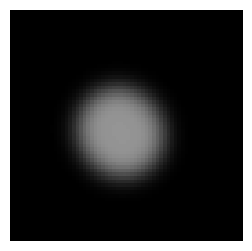

Example of output
0.10425228071581273
0.5728231713661212


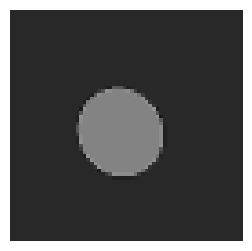

In [88]:
# Sanity check: take a look at training data
from random import randrange
plt.rcParams["figure.figsize"] = (3,3)

iii = randrange(5000)
print(iii)

print('Example of input')
im = train_input[iii,:,:]
print(np.amin(im))
print(np.amax(im))
plt.imshow(train_input[iii,:,:], cmap="gray",vmin=0, vmax=1,aspect='auto')
plt.axis('off')
plt.show()

print('Example of output')
im3 = train_gt[iii,:,:]
print(np.amin(im3))
print(np.amax(im3))
plt.imshow(train_gt[iii,:,:], cmap="gray",vmin=0, vmax=1,aspect='auto')
plt.axis('off')
plt.show()

In [25]:
# Create a validation set for training

valid_size = 1000  
train_gt, valid_gt       = train_test_split(train_gt, test_size=valid_size, shuffle=False)  
train_input, valid_input = train_test_split(train_input, test_size=valid_size, shuffle=False)  

print(np.amin(train_gt))
print(np.amax(train_gt))

print(np.amin(train_input))
print(np.amax(train_input))

0.0
1.0
0.0
0.9998537289407996


997
Example of input
1.2344916676566072e-05
0.4825317479455438


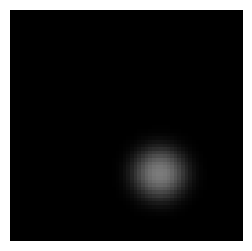

Example of output
0.10794539485739046
0.5457859283296325


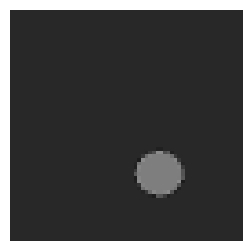

In [26]:
# Sanity check: take a look at validation data
from random import randrange
plt.rcParams["figure.figsize"] = (3,3)

iii = randrange(valid_size)
print(iii)

print('Example of input')
im = valid_input[iii,:,:]
print(np.amin(im))
print(np.amax(im))
plt.imshow(valid_input[iii,:,:], cmap="gray",vmin=0, vmax=1,aspect='auto')
plt.axis('off')
plt.show()

print('Example of output')
im3 = valid_gt[iii,:,:]
print(np.amin(im3))
print(np.amax(im3))
plt.imshow(valid_gt[iii,:,:], cmap="gray",vmin=0, vmax=1,aspect='auto')
plt.axis('off')
plt.show()

In [27]:
# Let's reshape the image data to the format the neural network expects for training

train_gt    = train_gt.reshape(-1,N,N,X)
train_input = train_input.reshape(-1,M,M,X)

valid_gt    = valid_gt.reshape(-1,N,N,X)
valid_input = valid_input.reshape(-1,M,M,X)

print(train_gt.shape)
print(train_input.shape)

(4000, 64, 64, 1)
(4000, 64, 64, 1)


#### Neural network architecture: fully connected

In [116]:
def make_basic_network():  
    inputs = Input(shape=(M,M,X))
    
    x = Dense(10, activation='relu')(inputs)
    x = BatchNormalization()(x)
    
    x = Dense(20, activation='relu')(x)
    x = BatchNormalization()(x)
    
    x = Dense(30, activation='relu')(x)
    x = BatchNormalization()(x)
    
    x = Dense(40, activation='relu')(x)
    x = BatchNormalization()(x)
    
    x = Dense(1, activation='sigmoid')(x)
    #x = Dense(1, activation='sigmoid')(x)

    funcmodel = Model(inputs, x)
    
    #funcmodel.compile(optimizer='rmsprop', loss=euclidean_distance_loss, metrics=[dice_coef])
    
    funcmodel.compile(optimizer='adadelta', loss='MSE')
    
    return funcmodel

#### Neural network architecture: CNN

In [28]:
def make_CNN():
    inputs = Input(shape=(M,M,X))
    
    u1 = Convolution2D(128, 3, activation='relu', padding='same')(inputs)
    u1 = BatchNormalization()(u1)
    
    u2 = Convolution2D(64, 3, activation='relu', padding='same')(u1)
    u2 = BatchNormalization()(u2)
    
    output = Convolution2D(X, 1, activation='sigmoid', padding='same')(u2)
    
    neural_network = Model(inputs, output)
    neural_network.compile(optimizer='adam', loss='MSE')
    
    return neural_network

#### Neural network architecture: Unet

In [106]:
def make_convolutional_autoencoder():
    # encoding
    inputs = Input(shape=(M,M,X))
    
    d1 = Convolution2D(64, 3, activation='relu', padding='same')(inputs)
    d1 = BatchNormalization()(d1)
    d2 = MaxPooling2D(padding='same')(d1)
    
    d3 = Convolution2D(128, 3, activation='relu', padding='same')(d2)
    d3 = BatchNormalization()(d3)
    encoded = MaxPooling2D(padding='same')(d3)    
    
    # decoding
    u1 = Convolution2D(128, 3, activation='relu', padding='same')(encoded)
    u1 = BatchNormalization()(u1)
    u2 = UpSampling2D()(u1)
    u2 = concatenate([u2, d3])
    
    u3 = Convolution2D(64, 3, activation='relu', padding='same')(u2)
    u3 = BatchNormalization()(u3)
    u4 = UpSampling2D()(u3)
    u4 = concatenate([u4, d1])
    
    decoded = Convolution2D(X, 1, activation='sigmoid', padding='same')(u4)
    
    # autoencoder
    autoencoder = Model(inputs, decoded)
    autoencoder.compile(optimizer='adam', loss='MSE')
    
    return autoencoder

In [117]:
# Create model

neural_network = make_basic_network()
#neural_network = make_CNN()
#neural_network = make_convolutional_autoencoder()

neural_network.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 dense_5 (Dense)             (None, 64, 64, 10)        20        
                                                                 
 batch_normalization_15 (Bat  (None, 64, 64, 10)       40        
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 64, 64, 20)        220       
                                                                 
 batch_normalization_16 (Bat  (None, 64, 64, 20)       80        
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 64, 64, 30)        630 

#### Train neural network

In [124]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=6) #early stopping

# train
history = neural_network.fit(train_input, train_gt, epochs=3, batch_size=5, 
                             validation_data=(valid_input, valid_gt), callbacks=[es])

Epoch 1/3
800/800 [==============================] - 34s 43ms/step - loss: 0.0526 - val_loss: 0.0493
Epoch 2/3
800/800 [==============================] - 41s 51ms/step - loss: 0.0473 - val_loss: 0.0436
Epoch 3/3
800/800 [==============================] - 35s 43ms/step - loss: 0.0432 - val_loss: 0.0376


In [109]:
# Save model
neural_network.save('models/ellipse_deblurring_unet')

INFO:tensorflow:Assets written to: models/ellipse_deblurring_unet/assets


INFO:tensorflow:Assets written to: models/ellipse_deblurring_unet/assets


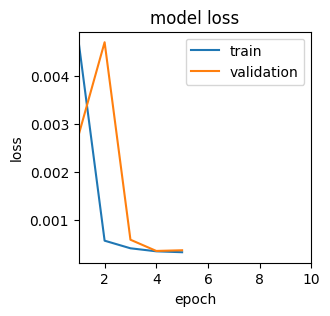

In [32]:
# summarize history for loss

loss_values = history.history['loss']
epochs      = range(1,len(loss_values)+1)

plt.plot(epochs,loss_values)
plt.plot(epochs,history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.xlim([1, 10])
plt.savefig('figures/loss_ellipse_superresolution_test1.png')
plt.show()

#### Test results with unseen data

In [ ]:
# Load model
autoencoder = models.load_model('models/ellipse_deblurring_CNN')

In [100]:
# Import testing input
test_input = []
files      = sorted(glob.glob("ellipses_test/*1.mat"))

sigma = 3.0 # blurring 

for myFile in files:
    print(myFile)
    mat    = scipy.io.loadmat(myFile)
    matrix = mat['ph']
    
    # resize matrix
    matrix_resized = cv2.resize(matrix, dsize=(M,M), interpolation=cv2.INTER_CUBIC)
    
    # apply gaussian blur
    matrix_blurred = skimage.filters.gaussian(matrix_resized, sigma=(sigma,sigma), truncate=3.5, channel_axis=-1)
    
    test_input.append(matrix_blurred)  
test_input = np.array(test_input)

# Import testing output (ground truth)
test_gt = []
files   = sorted(glob.glob("ellipses_test/*1.mat"))

for myFile in files:
    print(myFile)
    mat    = scipy.io.loadmat(myFile)
    matrix = mat['ph']
    
    # resize matrix
    matrix_resized = cv2.resize(matrix, dsize=(N,N), interpolation=cv2.INTER_CUBIC)
    
    test_gt.append (matrix_resized)
test_gt = np.array(test_gt)

ellipses_test/ph0001.mat
ellipses_test/ph0001.mat


In [110]:
# Normalize data

print('Input value range:')
min_input = np.amin(test_input)
max_input = np.amax(test_input)
print(min_input)
print(max_input)
test_input = (test_input - min_input) / (max_input - min_input)

print('Output value range:')
min_output = np.amin(test_gt)
max_output = np.amax(test_gt)
print(min_output)
print(max_output)
test_gt = (test_gt - min_output) / (max_output - min_output)

print('Normalized input value range:')
print(np.amin(test_gt))
print(np.amax(test_gt))

print('Normalized output value range:')
print(np.amin(test_input))
print(np.amax(test_input))

print(test_gt.shape)
print(test_input.shape)

test_gt     = test_gt.reshape(-1,N,N,X)
test_input  = test_input.reshape(-1,M,M,X)

print(test_gt.shape)
print(test_input.shape)

Input value range:
0.0
1.0
Output value range:
0.0
1.0
Normalized input value range:
0.0
1.0
Normalized output value range:
0.0
1.0
(1, 64, 64, 1)
(1, 64, 64, 1)
(1, 64, 64, 1)
(1, 64, 64, 1)


In [122]:
# Predict results on test set

test_gt_decoded = neural_network.predict(test_input)
print(test_gt_decoded.shape)

1/1 [==============================] - 0s 41ms/step
(1, 64, 64, 1)


0
Network input
0.0
1.0


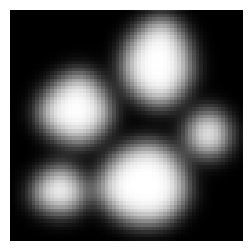

Network output
0.25949627
0.99999726


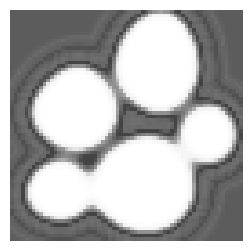

Ground truth
0.0
1.0


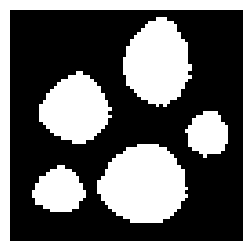

In [123]:
# We pass the testing inputs to the neural network to see the restored data

iii = 0
print(iii)

print('Network input')
im3 = test_input[iii,:,:]
print(np.amin(im3))
print(np.amax(im3))
plt.imshow(test_input[iii,:,:], cmap="gray",vmin=0, vmax=1,aspect='auto')
plt.axis('off')
plt.show()

print('Network output')
im3 = test_gt_decoded[iii,:,:]
print(np.amin(im3))
print(np.amax(im3))
plt.imshow(test_gt_decoded[iii,:,:], cmap="gray",vmin=0, vmax=1,aspect='auto')
plt.axis('off')
plt.show()

print('Ground truth')
im3 = test_gt[iii,:,:]
print(np.amin(im3))
print(np.amax(im3))
plt.imshow(test_gt[iii,:,:], cmap="gray",vmin=0, vmax=1,aspect='auto')
plt.axis('off')
plt.show()

In [105]:
# Save whole test set as mat.-files

for iii in range(len(test_gt_decoded)):
    mydata   = test_gt_decoded[iii,:,:,:]
    filename = "results/ellipse_deblurring_%04.f.mat" % iii
    savemat(filename, {'mydata': mydata})
    print(iii)

0


## To do: Experiment!
Try out different hyperparameters for the neural networks. What yields the best results? Things to experiment with:

- neural network type (compare number of learned parameters!)
- number of neurons in each layer (make sure dimensions match the data!)
- how many epochs necessary to reach convergence?
- loss functions (mean squared error, custom loss functions?) 
- activation functions (relu, sigmoid, tanh...)
- to use batch normalization or not?
- optimizer (adam, adadelta, rmsprop...)